In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [4]:
data_path = os.path.join(os.getcwd(), "Student_Performance.csv")
df = pd.read_csv(data_path)

# Display first few rows
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**Converting categorical data in numeric values and feature scaling**

In [116]:
df["Extracurricular Activities"] = np.where(df["Extracurricular Activities"] == "Yes", 1, 0)

**Normalizing the data**

***The mean values of each column after normalization might not be equal to 0 this is due to the floating point precision,
permissible error would be +/- 1e-16***

In [117]:
mean = df.iloc[:,0:5].mean(axis =0)
std = df.iloc[:,0:5].std(axis=0)

x = (df.iloc[:,0:5] - mean)/std

x.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.433520e-16,-1.300293e-16,-2.522427e-17,1.417533e-16,-1.087130e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.542072e+00,-1.697829e+00,-9.896040e-01,-1.492220e+00,-1.598446e+00
25%,-7.696649e-01,-8.905936e-01,-9.896040e-01,-9.025493e-01,-9.009371e-01
50%,2.742045e-03,-2.569890e-02,-9.896040e-01,2.767912e-01,1.453259e-01
75%,7.751490e-01,8.968554e-01,1.010404e+00,8.664615e-01,8.428346e-01
max,1.547556e+00,1.704090e+00,1.010404e+00,1.456132e+00,1.540343e+00


**Splitting the data in training and testing sets (80-20)**

In [118]:
x_norm = np.array(x.iloc[0:8000])
x_test_norm = np.array(x.iloc[8000:10000])

y_train = np.array(df.iloc[0:8000,5])
y_test = np.array(df.iloc[8000:10000,5])

In [119]:
print(x_norm.shape, x_test_norm.shape, y_train.shape, y_test.shape, sep="\n")

(8000, 5)
(2000, 5)
(8000,)
(2000,)


**Plotting the data**

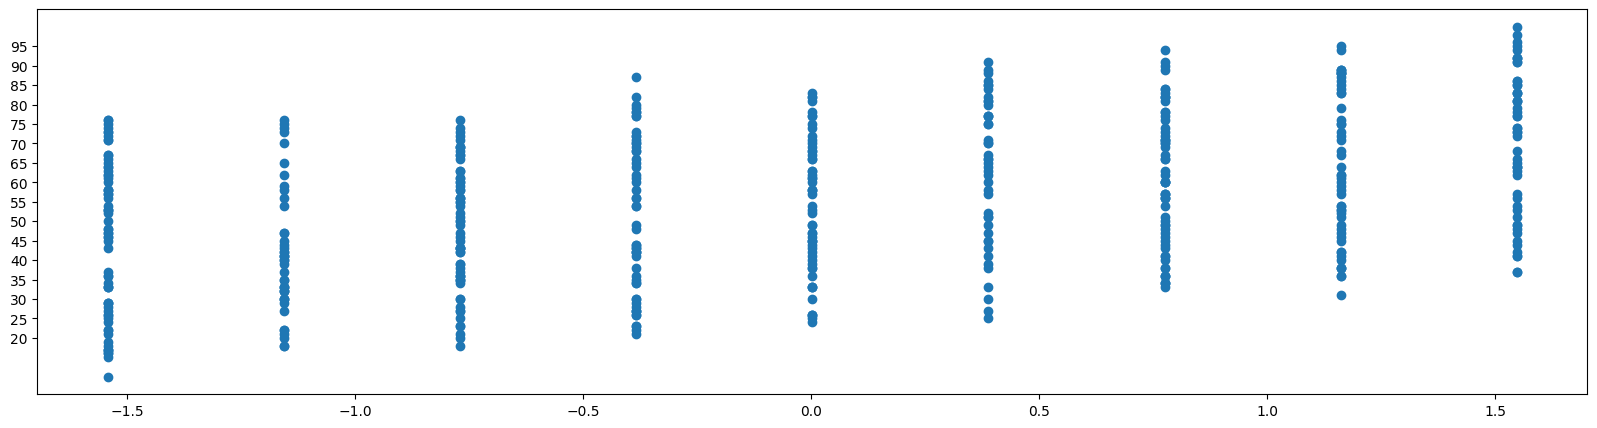

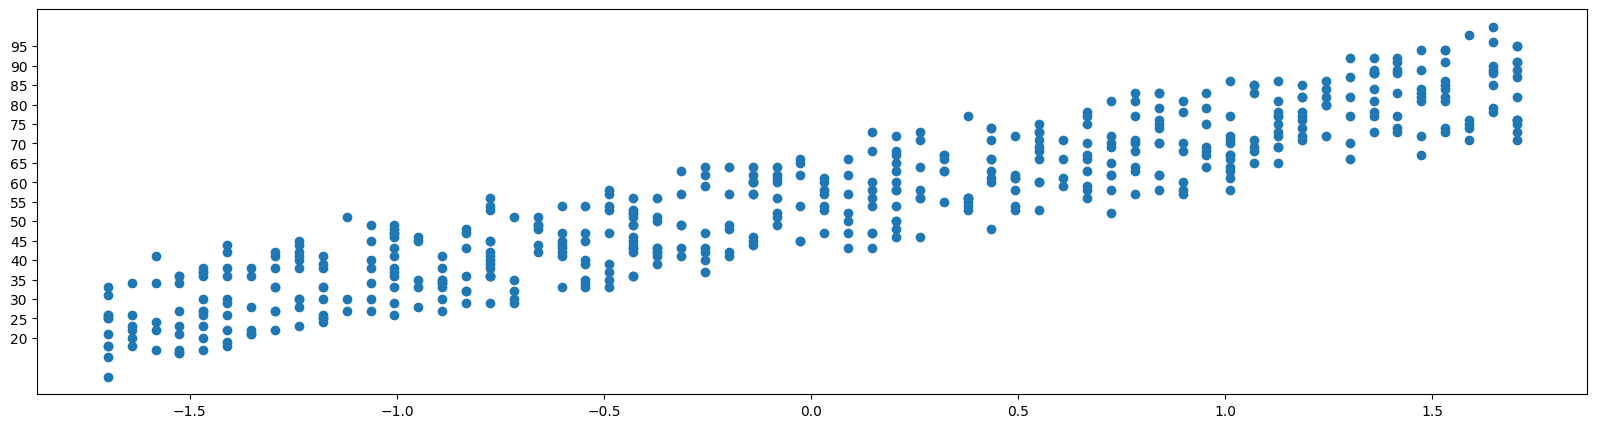

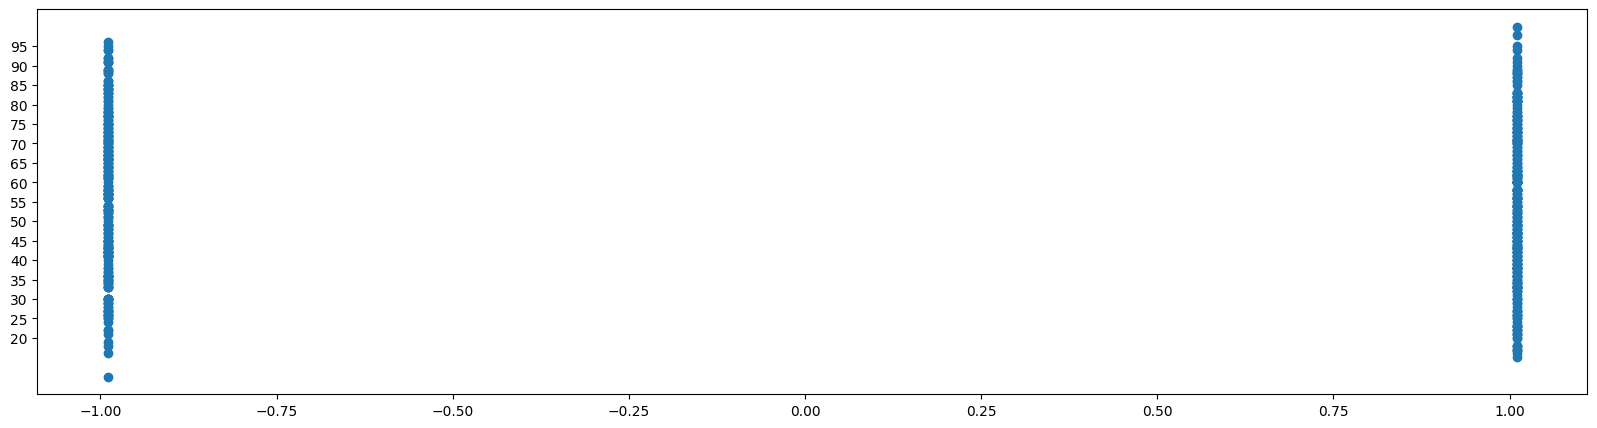

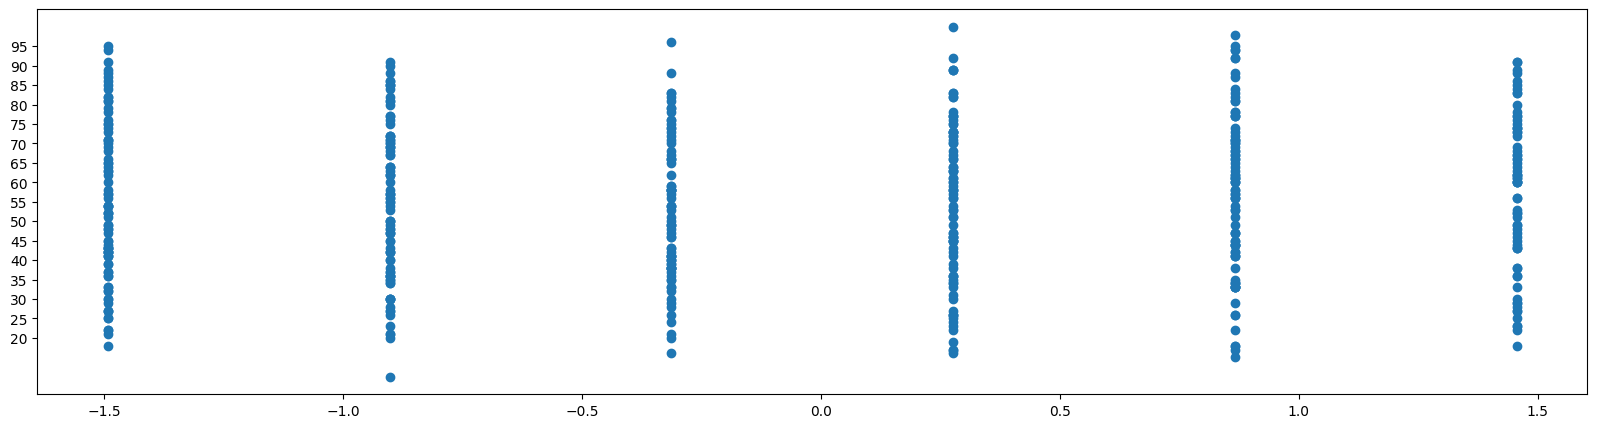

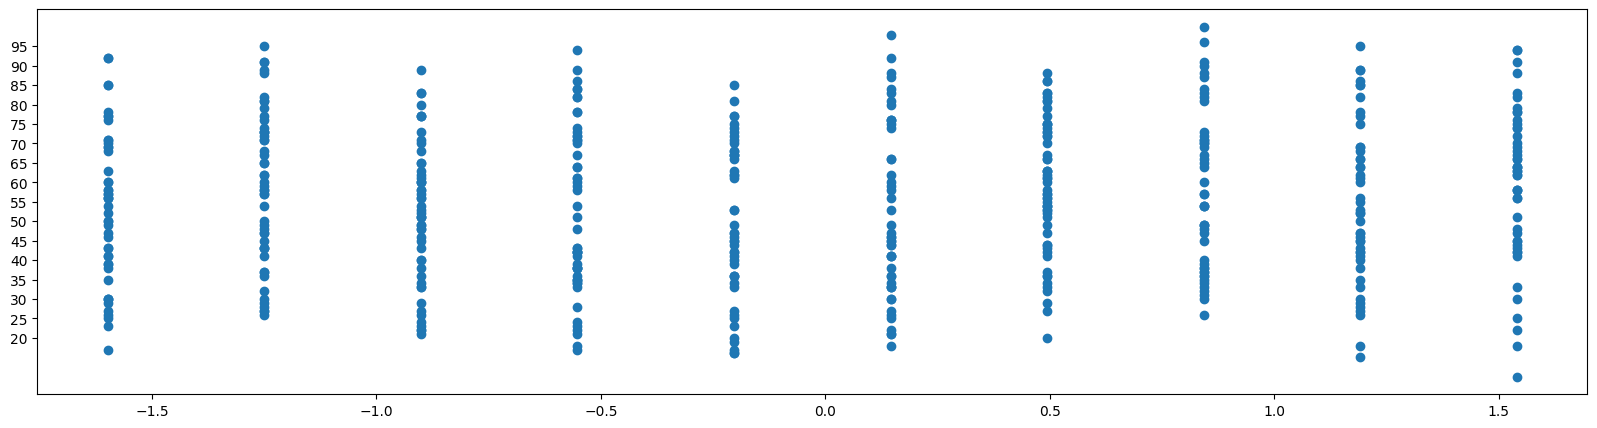

In [132]:
y = np.arange(20, 100, 5)
for i in range(x_norm.shape[1]) :
    try :    
        plt.figure(i+1, figsize=(20, 5))
        plt.scatter(x_norm[0:500,i], y_train[0:500])
        plt.yticks(y)
    except :
        print(f"problem with {i+1}th feature")

In [121]:
w_in = np.array([0 for _ in range(x_norm.shape[1])], dtype="float64")
b_in = 0

In [122]:
def compute_cost(x, y, w, b) :
    m = x.shape[0]
    
    cost = ((x @ w + b - y)**2).sum()/(2*m)

    return cost

In [123]:
print(compute_cost(x_norm,y_train, w_in, b_in))
print((y_train**2).sum()/(2*x_norm.shape[0]))

1706.83125
1706.83125


In [124]:
def gradient(x, y, w, b) :
    m = x.shape[0]

    A = x @ w + b - y

    dj_dw = np.matmul(A,x)
    dj_db = A.sum()

    return dj_dw, dj_db

In [125]:
def gradient_descent(x, y, w_in, b_in, alpha, n_iters) :

    w = w_in
    b = b_in
    m = x.shape[0]
    j_hist = []
    
    for i in range(n_iters) :
        dj_dw, dj_db = gradient(x, y, w, b)
        
        w -= alpha*dj_dw
        b -= alpha*dj_db

        #if i % 100 == 0 :
        j_hist.append(compute_cost(x, y, w, b))

    return w, b, j_hist

**Running gradient descent on the training set**

In [126]:
alpha = 1e-4
n_iters = 250

w_final, b_final, j_hist = gradient_descent(x_norm, y_train, w_in, b_in, alpha, n_iters)

In [127]:
print(w_final)
print(b_final)
print(len(j_hist))

[ 7.38336987 17.6557312   0.31565193  0.80414252  0.54880281]
55.21030201676838
250


**Plotting Cost vs Iterations**

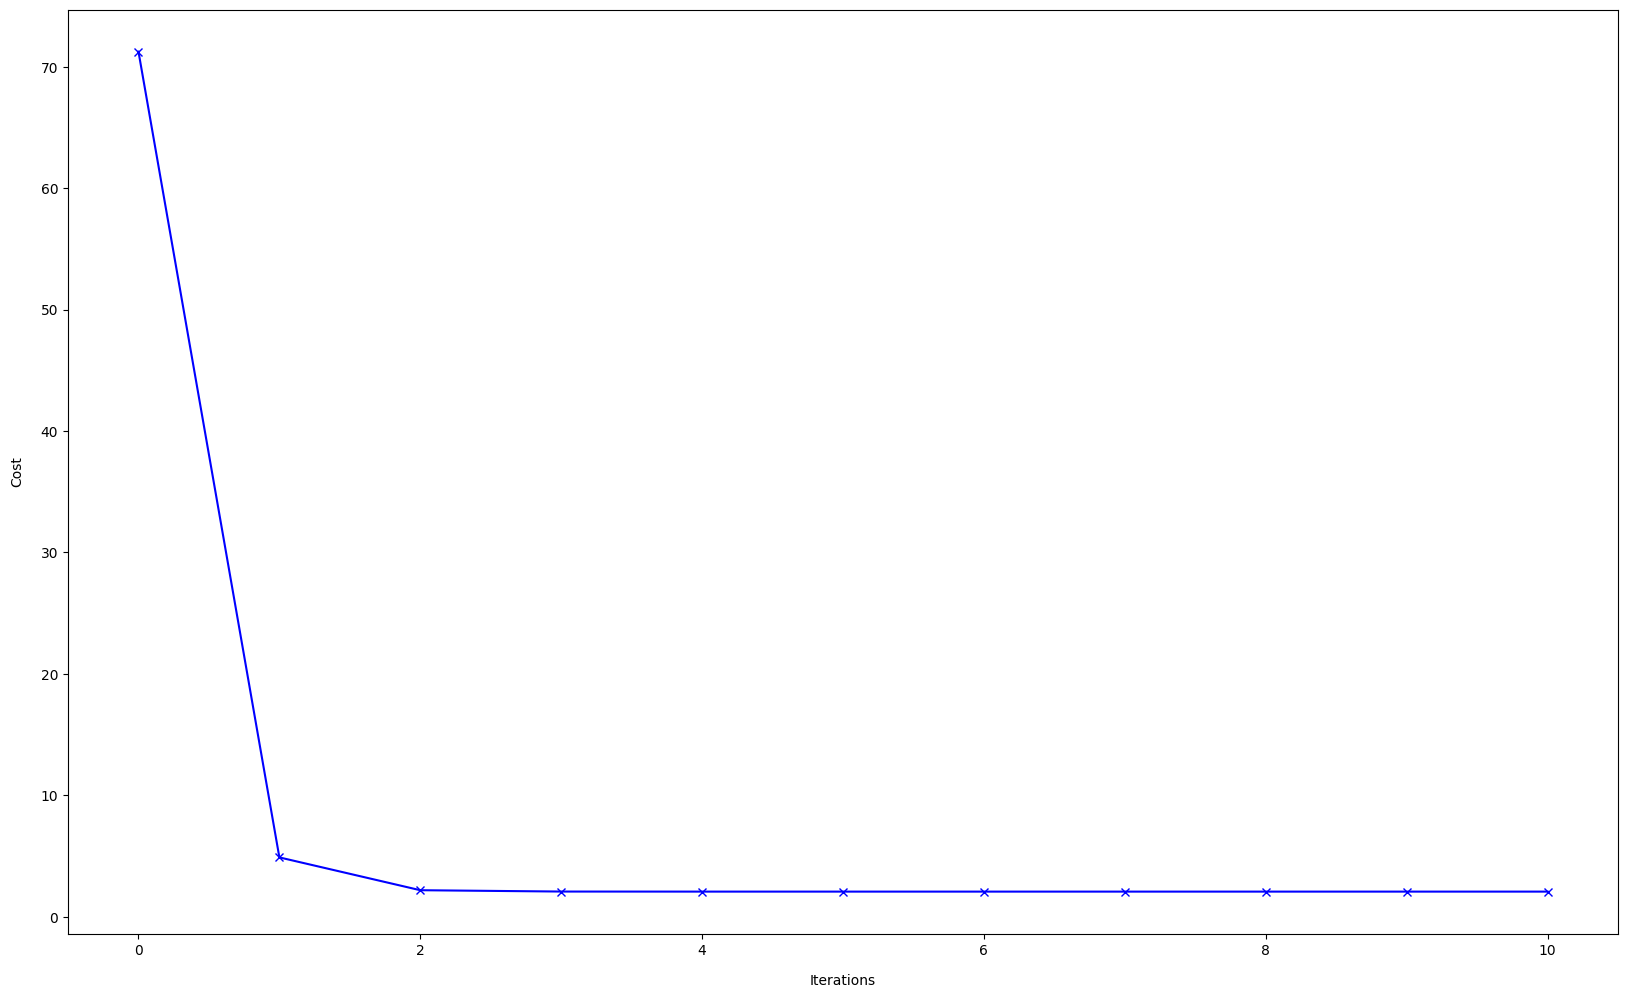

In [128]:
x_axis = np.arange(0, 11)

plt.figure(figsize=(20,12))
plt.plot(x_axis, j_hist[0:11], color="blue", marker='x')
plt.xlabel("Iterations", labelpad = 12)
plt.ylabel("Cost", labelpad = 12)
plt.show()

**Testing**

In [130]:
f_wb = x_test_norm @ w_final + b_final

for i in range(0,len(y_test),100) :
    print(f"Prediction -{i+1}: {f_wb[i]:3.3} ,   Target -{i+1}: {y_test[i]}")

Prediction -1: 24.7 ,   Target -1: 28.0
Prediction -101: 32.2 ,   Target -101: 31.0
Prediction -201: 69.9 ,   Target -201: 73.0
Prediction -301: 47.9 ,   Target -301: 47.0
Prediction -401: 91.2 ,   Target -401: 93.0
Prediction -501: 28.3 ,   Target -501: 27.0
Prediction -601: 54.7 ,   Target -601: 53.0
Prediction -701: 58.7 ,   Target -701: 58.0
Prediction -801: 81.0 ,   Target -801: 86.0
Prediction -901: 78.6 ,   Target -901: 77.0
Prediction -1001: 31.3 ,   Target -1001: 27.0
Prediction -1101: 29.5 ,   Target -1101: 24.0
Prediction -1201: 56.7 ,   Target -1201: 56.0
Prediction -1301: 74.0 ,   Target -1301: 74.0
Prediction -1401: 44.0 ,   Target -1401: 43.0
Prediction -1501: 64.3 ,   Target -1501: 65.0
Prediction -1601: 71.0 ,   Target -1601: 70.0
Prediction -1701: 61.1 ,   Target -1701: 58.0
Prediction -1801: 61.7 ,   Target -1801: 60.0
Prediction -1901: 39.5 ,   Target -1901: 40.0


**Evaluation**

In [141]:
def RMSE(x, y, w, b) :
    m = x.shape[0]
    
    err = np.sqrt(((x @ w + b - y)**2).sum())/m 

    return err

In [142]:
def MSE(x, y, w, b) :
    m = x.shape[0]
    
    err = ((x @ w + b - y)**2).sum()/m 

    return err

In [134]:
def R2(x, y, w, b) :
    err = ((x @ w + b - y)**2).sum()/((b - y)**2).sum()
    
    return 1 - err

In [144]:
print(f"R^2 Training  : {R2(x_norm, y_train, w_final, b_final)*100:.4}%")
print(f"R^2 Testing : {R2(x_test_norm, y_test, w_final, b_final)*100:.4}%")

print(f"RMSE Training : {RMSE(x_norm, y_train, w_final, b_final):.4}")
print(f"MSE Training : {MSE(x_norm, y_train, w_final, b_final):.4}")

print(f"RMSE Testing : {RMSE(x_test_norm, y_test, w_final, b_final):.4}")
print(f"MSE Testing : {MSE(x_test_norm, y_test, w_final, b_final):.4}")

R^2 Training  : 98.88%
R^2 Testing : 98.84%
RMSE Training : 0.02272
MSE Training : 4.128
RMSE Testing : 0.04608
MSE Testing : 4.247
